# Multinomial Logistic Regression

In [1]:
# Import libraries

import sklearn
import numpy as np

In [15]:
# Import Dataset
from sklearn.datasets import load_iris

dataset = load_iris()
print(dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [21]:
from sklearn.model_selection import train_test_split

features = dataset.data
target = dataset.target

X_train,X_test, y_train,y_test = train_test_split(features,target,test_size=0.20,random_state=123)

/Users/juanelgueta/multinomial-logistic-regression/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


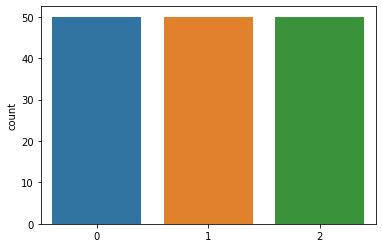

In [451]:
import seaborn as sns
import matplotlib.pyplot as plt

x=sns.countplot(target)
plt.savefig("target-distribution.png")


In [97]:
X_train.shape

(120, 4)

In [428]:
class LogisticRegressor(object):
    """
    Logistic Regression Classifier

    Parameters
    ----------
    learning_rate : int or float, default=0.1
        The tuning parameter for the optimization algorithm (here, Gradient Descent) 
        that determines the step size at each iteration while moving toward a minimum 
        of the cost function.

    max_iter : int, default=100
        Maximum number of iterations taken for the optimization algorithm to converge
    
    regularization : None or 'l2', default='l2'.
        Option to perform L2 regularization.
        
    C : float, default=0.1
        Inverse of regularization strength; must be a positive float. 
        Smaller values specify stronger regularization.

    tolerance : float, optional, default=1e-4
        Value indicating the weight change between epochs in which
        gradient descent should terminated. 
    """

    def __init__(self, learning_rate=0.01, max_iter=1000, regularization='l2', C = 0.01, tolerance = 1e-4):
        self.learning_rate  = learning_rate
        self.max_iter       = max_iter
        self.regularization = regularization
        self.C              = C
        self.tolerance      = tolerance
    
    def fit(self, X, y):
        """
        Fit model to training data.

        Parameters
        ----------
        X : array-like, sparse matrix of shape (m, n)
            Training vector, where m is the number of samples and
            n is the number of features.
        y : array-like of shape (m,)
            Target variable for model.
        
        Returns
        -------
        self : object
        """

        y_onehot = self.onehot_encode(y)

        self.loss_steps, self.W = self.gradient_descent(X,y_onehot,self.max_iter,self.learning_rate,self.C,self.tolerance)
                
        return self

    def onehot_encode(self,Y):
        """
        One hot encode categorical values
        
        Parameters
        ----------
            Y : array-like 
                categorical values to encode.
        
        Returns
        -------
        np.array of shape (m, n) 
        where m is the lenght of the original array and m the total number of categories.

        """
        unique_vals = np.unique(Y)
        
        one_hot_encode = []

        for i in Y:
            arr = list(np.zeros(len(unique_vals), dtype = int))
            arr[i] = 1
            one_hot_encode.append(arr)

        return np.array(one_hot_encode)

    def softmax(self,x):
        """
        Compute softmax values for each sets of scores in x.
        Softmax takes as input a vector of real numbers, and normalizes it into a probability distribution.

        Parameters
        ------------

        x : array_like
            Vector over which to apply softmax function

        Returns
        ------------
        np.array values for probability distribution, the result will sum to 1 along the specified axis
        """
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum()

    def loss(self,X, Y, W):
        """
        loss function for multinomial logistic regression. 
        Used to determine the error between predicted values and target values.

        Parameters
        ----------
        X : Feature vector.
        Y : Array-like onehot encoded target values.
        W : Weights.

        Returns
        ----------
        loss: float 
            error between predicted values and target values.

        """
        Z = - X @ W
        N = X.shape[0]
        loss = 1/N * (np.trace(X @ W @ Y.T) + np.sum(np.log(np.sum(np.exp(Z), axis=1))))
        return loss

    def gradient(self,X, Y, W, C):
        """
        Gradient over which to apply gradient descent.
        Objective function of the model.

        Parameters
        ----------
        X : Feature vector.
        Y : Array-like onehot encoded target values.
        W : Weights.
        C : Regularization penalty.

        Returns
        ----------
        gd : np.array
            output value of the function evaluated at params.         
        """
        Z = - X @ W
        P = np.apply_along_axis(self.softmax,1,Z)
        N = X.shape[0]
        gd = 1/N * (X.T @ (Y - P)) + 2 * C * W
        return gd

    def gradient_descent(self,X, Y, max_iter=10000, learning_rate=0.01, C=0.01, tolerance=1e-06):
        """
        loss function for multinomial logistic regression. 
        Used to determine the error between predicted values and target values.

        Parameters
        ----------
        learning_rate : int or float, default=0.1
            The tuning parameter for the optimization algorithm (here, Gradient Descent) 
            that determines the step size at each iteration while moving toward a minimum 
            of the cost function.
        max_iter : int, default=100
            Maximum number of iterations taken for the optimization algorithm to converge
        regularization : None or 'l2', default='l2'.
            Option to perform L2 regularization. 
        C : float, default=0.1
            Inverse of regularization strength; must be a positive float. 
            Smaller values specify stronger regularization.
        tolerance : float, optional, default=1e-4
            Value indicating the weight change between epochs in which
            gradient descent should terminated. 

        Returns
        ----------
        df : dict 
        W : np.array


        """
        W = np.zeros((X.shape[1], Y.shape[1]))
        step = 0
        step_lst = [] 
        loss_lst = []
        W_lst = []
    
        while step < max_iter:
            step += 1
            W -= learning_rate * self.gradient(X, Y, W, C)
            step_lst.append(step)
            W_lst.append(W)
            if np.all(np.abs(W) <= tolerance):
                break
            loss_lst.append(self.loss(X, Y, W))

        df = {
            'step': step_lst, 
            'loss': loss_lst
        }

        return df, W
        
    def predict_proba(self, X):
        """
        Probability estimates for samples in X.
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Vector to be scored, where `n_samples` is the number of samples and
            `n_features` is the number of features.
        Returns
        -------
        probs : array-like of shape (n_samples,)
            Returns the probability of each sample.
        """
        
        return np.apply_along_axis(self.softmax,1,- X @ self.W)
    
    def predict(self, X):
        """
        Predict class labels for samples in X.
        Parameters
        ----------
        X : array_like or sparse matrix, shape (n_samples, n_features)
            Samples.
        Returns
        -------
        labels : array, shape [n_samples]
            Predicted class label per sample.
        """

        return np.argmax(self.predict_proba(X), axis=1)
    


In [436]:
my_model = LogisticRegressor(learning_rate=0.1)
my_model.fit(X_train,y_train)

In [437]:
my_model.predict(X_test) 

array([1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 0])

In [439]:
my_model.predict(X_test) == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

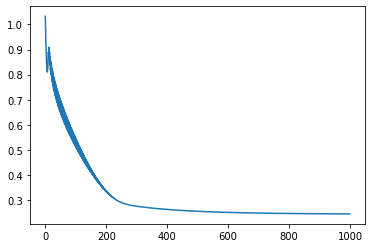

In [440]:
import matplotlib.pyplot as plt

plt.plot(my_model.loss_steps['loss'])
plt.show()

In [445]:
from sklearn.metrics import classification_report


print(classification_report(y_true=y_test, y_pred=my_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [434]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/juanelgueta/multinomial-logistic-regression/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [435]:
logreg.predict(X_test) == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [446]:
print(classification_report(y_true=y_test,y_pred=logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

